In [1]:
import apss_lib
import ppcompute
import numpy as np
import wavelet
import ppplot
%matplotlib inline

2019-12-06 21:45:18.184802


In [2]:
zevar = "PRE" ; zefreq = 0.1 # to speed-up we downsample
remove_seasonal = True # [same result but remove spurious maxima at COI's tip and better contrast]
############################
#zevar = "HWS" ; zefreq = 0.01 ; remove_seasonal = False # to speed-up we downsample
#zevar = "MAT" ; zefreq = 0.01 ; remove_seasonal = True # to speed-up we downsample
#zevar = "PAT" ; zefreq = 0.01 ; remove_seasonal = True # to speed-up we downsample
############################
sol = 3700.*24.
############################
window1 = 2. # spp is baroclinic (similar with 3 or 4)
#window1 = 1. # spp is diurnal tide
#window1 = 1./24. # spp is everything large-scale
############################
zereload = True ; apss_lib.verbose = True
zereload = False ; apss_lib.verbose = False
############################ 38,54
sequences = [\
             (15,14),\
             (33,59),\
             (95,12),\
             (123,48),\
             (173,16),\
             (190,26),\
             (219,12),\
             (233,13),\
             (247,19),\
             (285,15),\
             (300,45),\
             (346,17),\
            ]
#sequences = [(15,14)]

15 15.000004131944445 15.999993240740741


/home/aspiga/soft/planetoplot/modules/ppplot.py:296: RuntimeWarning: invalid value encountered in less
  else:          what_I_plot[ what_I_plot < zevmin*(1.+small_enough) ] = zevmin*(1.+small_enough)
/home/aspiga/soft/planetoplot/modules/ppplot.py:297: RuntimeWarning: invalid value encountered in greater
  what_I_plot[ what_I_plot > miss  ] = -miss
/home/aspiga/soft/planetoplot/modules/ppplot.py:298: RuntimeWarning: invalid value encountered in greater
  what_I_plot[ what_I_plot > zevmax ] = zevmax*(1.-small_enough)


33 33.00003790509259 33.99996046296296
95 95.00003560185185 95.99996179398148
123 123.28830546296297 123.99996351851851
173 173.00008586805555 173.99989537037038
190 190.00000424768518 190.99999204861112
219 219.0000050462963 219.9999897337963
233 233.00000424768518 233.99998880787038
247 247.01338680555557 247.99998998842594
285 285.0000070023148 285.99999033564814
300 300.00000010416665 300.99999510416666
346 346.0000057060185 346.99999019675926


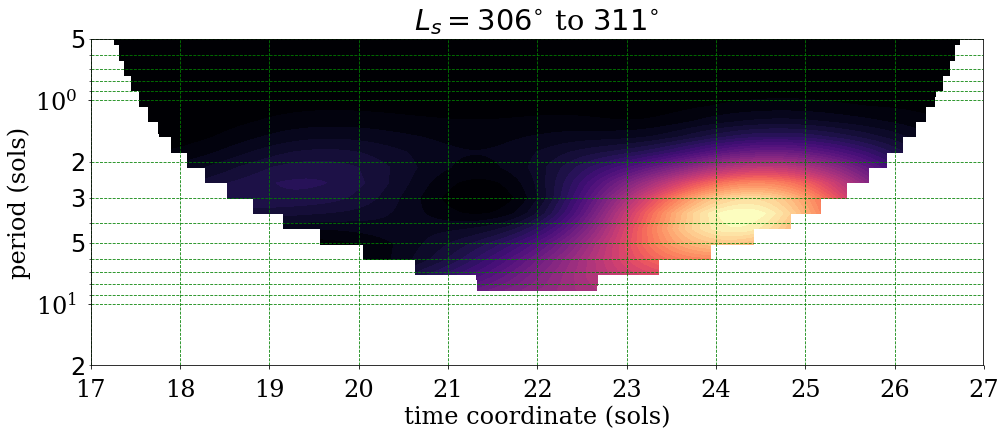

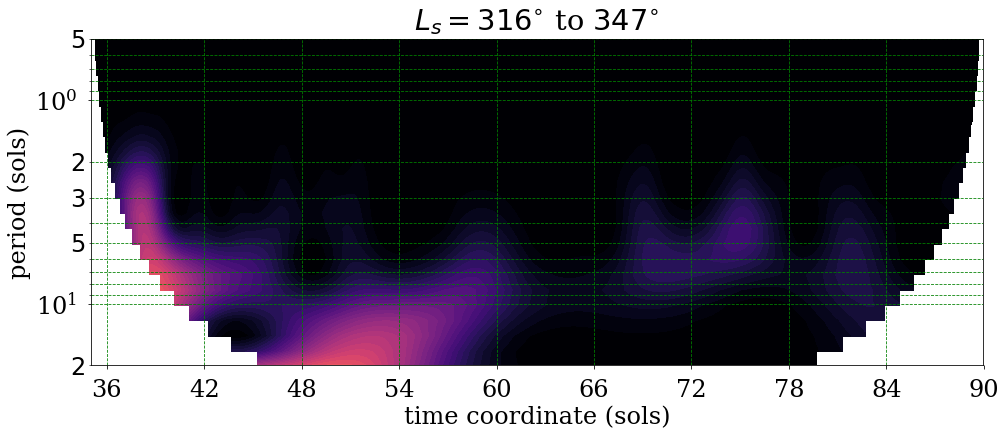

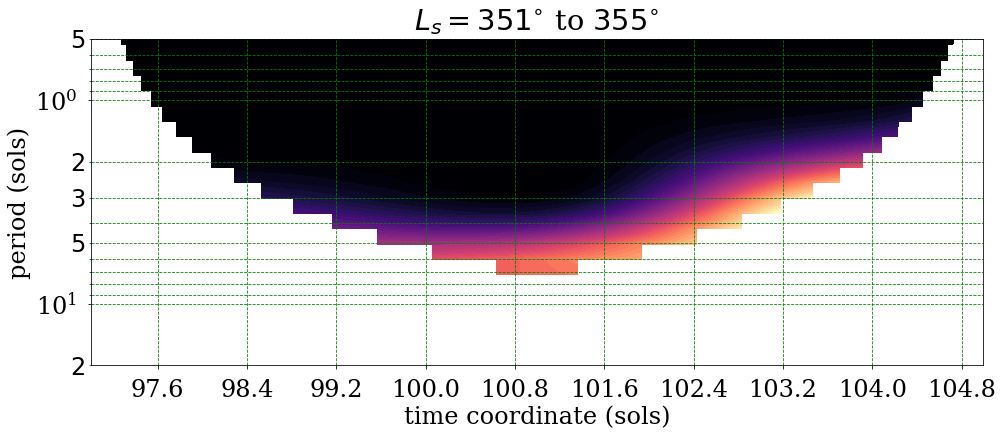

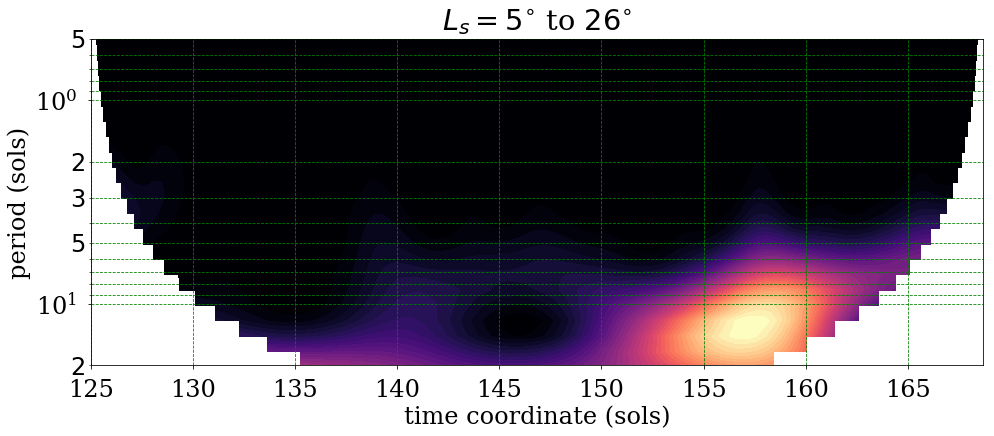

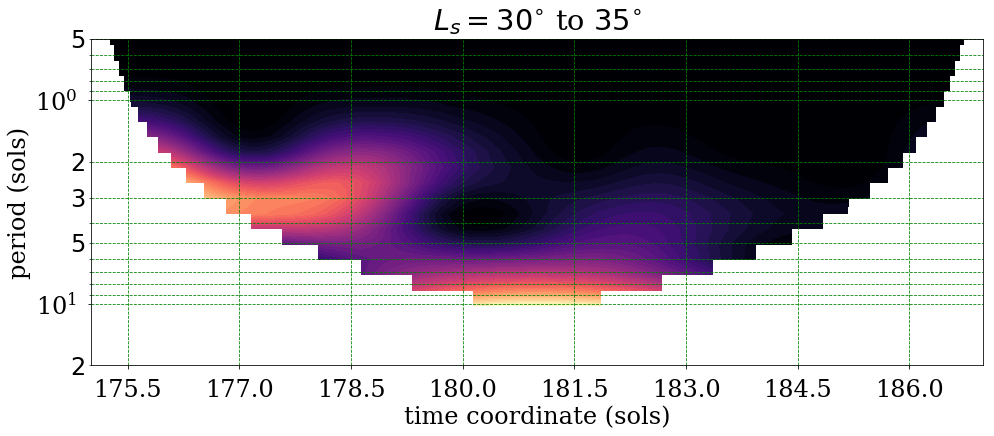

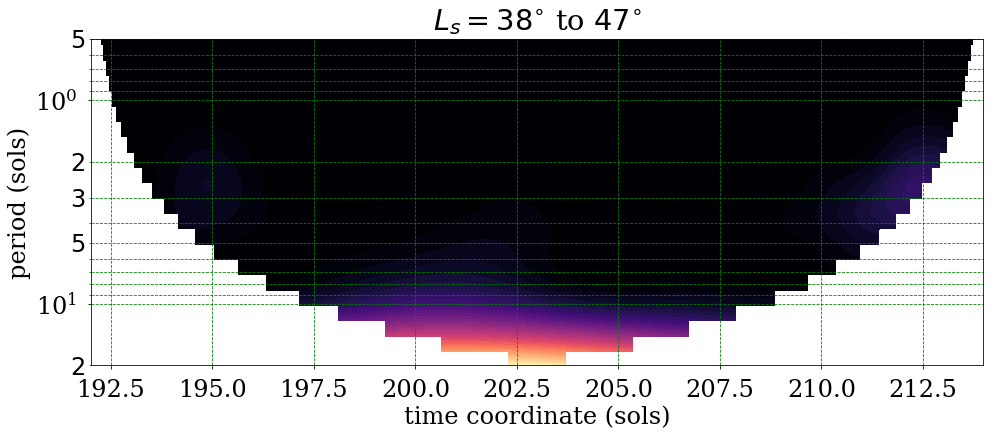

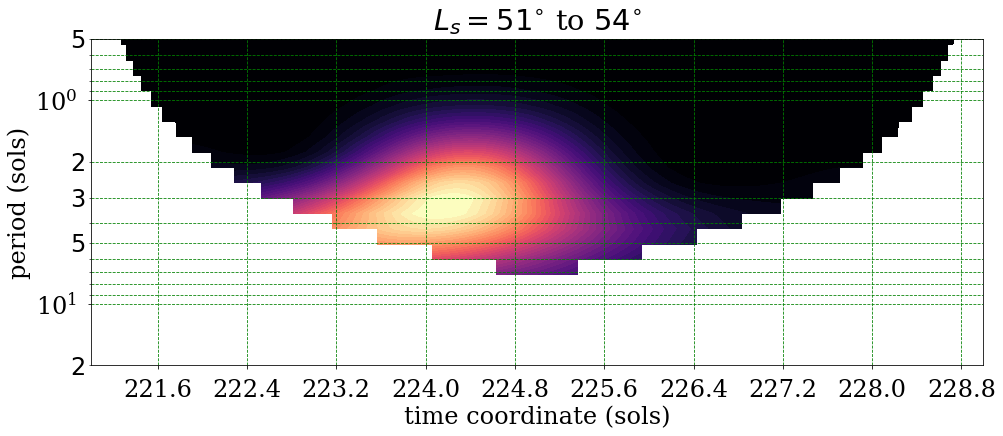

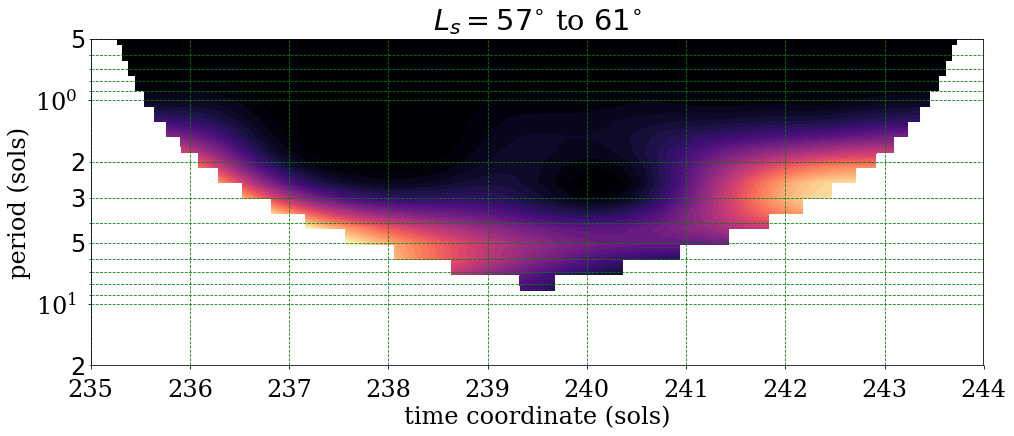

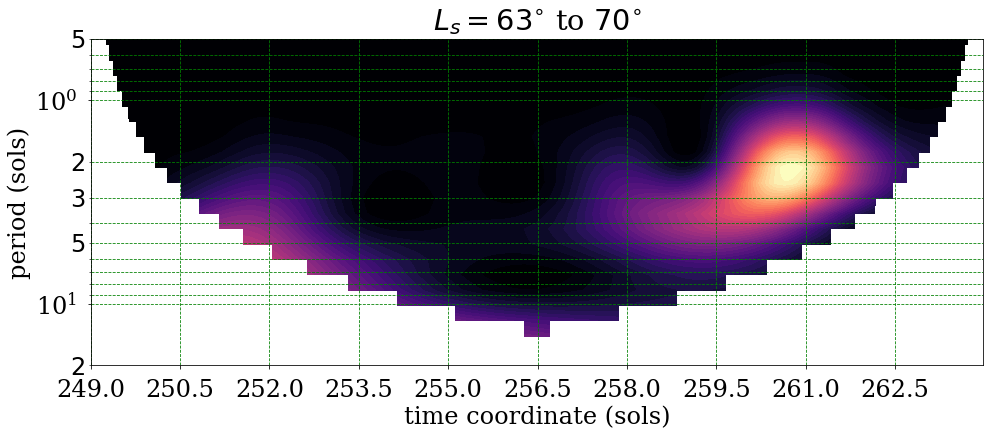

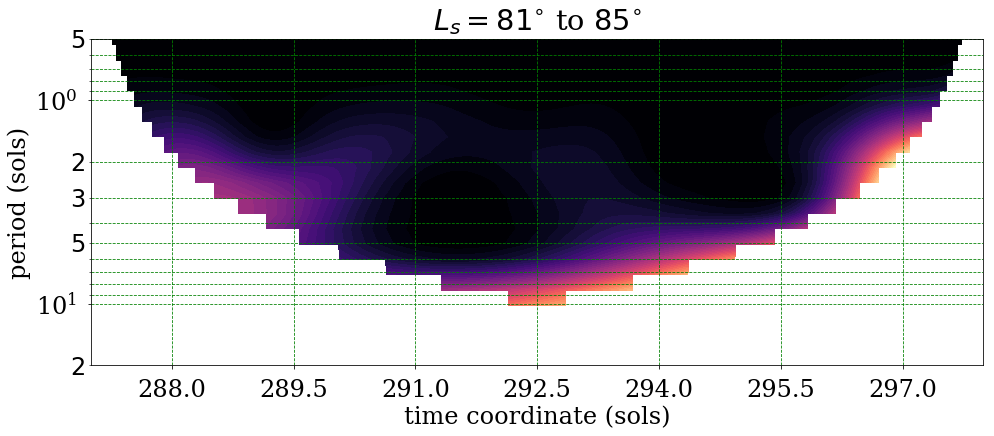

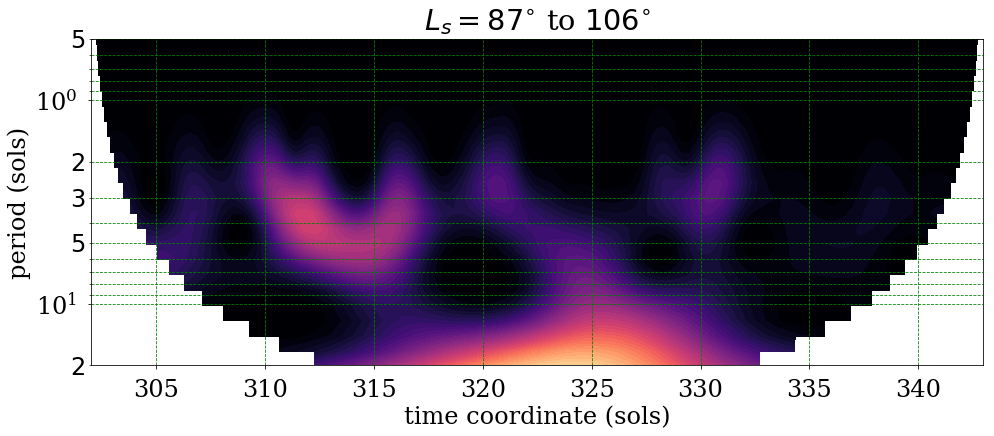

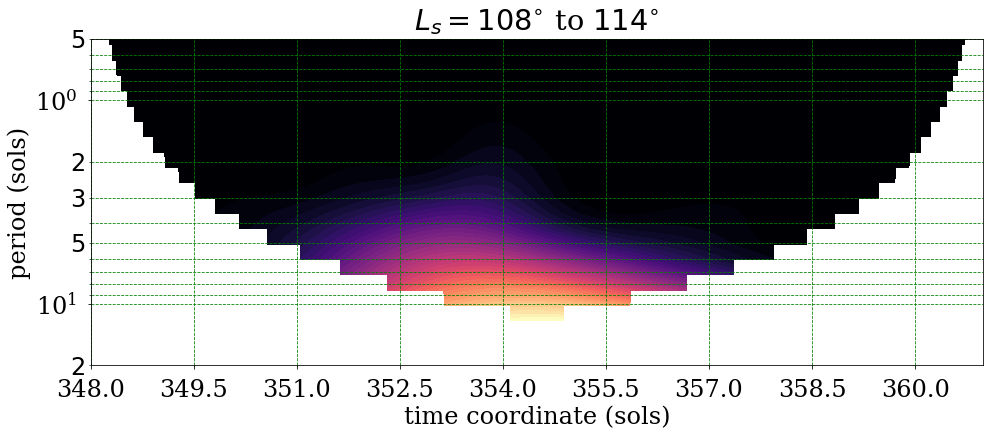

In [3]:
for seq in sequences:

    solini,solsol = seq
    
    data_all = apss_lib.getsol(solini,var=zevar,distant=True,reload=zereload) 
    time_all = solini + (apss_lib.gettime(data_all,"LMST")/24.)
    print solini, time_all[0],time_all[-1]
    for ss in range(solini+1,solini+solsol):
        datadd = apss_lib.getsol(ss,var=zevar,distant=True,reload=zereload) 
        time = ss + (apss_lib.gettime(datadd,"LMST")/24.)
        data_all = np.append(data_all,datadd)
        time_all = np.append(time_all,time)
        #print ss, time[0],time[-1]
    data = data_all
    time = time_all
        
    dpp,spp = apss_lib.smoothresample(data,zevar,ikind="linear",freq=zefreq,reinterpolate=False,window=sol*window1)
    wavfield = spp
    contrast = 5.
    contrast = 1.
    if remove_seasonal:
        window2 = sol*10.*zefreq # remove seasonal trend
        dpp, spp = apss_lib.detrendsmooth(spp,window2)
        wavfield = dpp
        contrast = 1.
    bounds = int(zefreq*sol*window1)
    wavfield = wavfield[bounds:-bounds]

    lsin,lsout = apss_lib.insight_sol2ls(solini+window1),apss_lib.insight_sol2ls(solini+solsol-1-window1) 
    title = r'$L_s = %i^{\circ}$ to $%i^{\circ}$' % (lsin,lsout)
    fifi = "daily_solini%i_solsol%i_%s"%(solini,solsol,zevar)

    wavelet.wavelet(wavfield,\
                freq=zefreq,ymin=0.5,ymax=20.,\
                offset = solini+window1,facperiod = sol,unit = "sols",\
                contrast=contrast,title=title,\
                filename=fifi)
    
    xx = (solini+window1)+((solsol-2)*np.arange(wavfield.size))/float(wavfield.size)
    np.save(fifi+"_ff.npy",wavfield)
    np.save(fifi+"_xx.npy",xx)

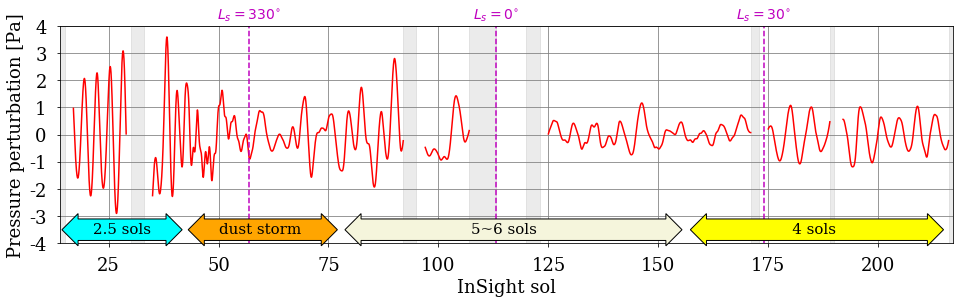

In [65]:
##################
damax = 375
damax = 217
##################
ppplot.changefont(18)
fig = ppplot.figuref(x=16,y=4)
pl = ppplot.plot1d(fig=fig)
pl.marker, pl.linestyle = "", "-"
####
if zevar == "PRE":
    pl.ymin, pl.ymax, pl.nyticks = -4, +4, 8
    pl.color = "r"
    pl.ylabel = "Pressure perturbation [Pa]"
elif zevar == "HWS":
    pl.ymin, pl.ymax, pl.nyticks = 3, 11, 8
    pl.color = "b"
    pl.ylabel = "Wind speed [m/s]"
elif zevar == "MAT":
    pl.ymin, pl.ymax, pl.nyticks = -2, +2, 4
pl.xmin, pl.xmax = 14, damax
pl.xlabel = "InSight sol"
####
data = coord = np.array([])
for seq in sequences:    
    solini, solsol = seq
    fifi = "daily_solini%i_solsol%i_%s"%(solini,solsol,zevar) 
    wavfield = np.load(fifi+"_ff.npy")
    xx = np.load(fifi+"_xx.npy")
    pl.f, pl.x = wavfield, xx
    pl.make()
    ############
    #data = np.append(data,[0.]) ; coord = np.append(coord,[xx[0]-0.001])
    data = np.append(data,wavfield) ; coord = np.append(coord,xx)
    #data = np.append(data,[0.]) ; coord = np.append(coord,[xx[-1]+0.001])
####
for tt in apss_lib.ttab:
    sol,ls = tt
    if pl.xmin < sol < pl.xmax:
        pl.x, pl.f = [sol,sol], [pl.ymin,pl.ymax]
        pl.marker, pl.linestyle = "", "--"
        pl.color = 'm'    
        pl.ax.text(sol,pl.ymax*1.1,r'$L_s=%i^{\circ}$'%(ls),\
               color = pl.color,horizontalalignment='center',verticalalignment='center',\
               fontsize=14)
        pl.ax = apss_lib.add_stripes(pl.ax)
        pl.make()
        
        
bbox_props = dict(boxstyle="darrow,pad=0.25", fc="cyan")
t = pl.ax.text(28, -3.5, "    2.5 sols    ", ha="center", va="center", rotation=0,
            size=15,
            bbox=bbox_props) 

bbox_props = dict(boxstyle="darrow,pad=0.25", fc="orange")
t = pl.ax.text(60, -3.5, "    dust storm     ", ha="center", va="center", rotation=0,
            size=15,
            bbox=bbox_props) 

bbox_props = dict(boxstyle="darrow,pad=0.25", fc="beige")
t = pl.ax.text(117, -3.5, "                        5~6 sols                            ", ha="center", va="center", rotation=0,
            size=15,
            bbox=bbox_props) 

bbox_props = dict(boxstyle="darrow,pad=0.25", fc="yellow")
t = pl.ax.text(186, -3.5, "                   4 sols                    ", ha="center", va="center", rotation=0,
            size=15,
            bbox=bbox_props) 

ppplot.save(filename=zevar+"%i"%(pl.xmax),mode="pdf")

In [5]:
if 0 == 1:

    import numpy as np
    import scipy.interpolate as spint
    import wavelet

    print coord.size, data.size
    func = spint.interpolate.interp1d(coord, data, kind="linear", fill_value="extrapolate")

    newx = np.arange(coord[0],coord[-1],1./sol)
    print newx

    extrap = func(newx)

    ppplot.changefont(18)
    fig = ppplot.figuref(x=16,y=4)
    pl = ppplot.plot1d(fig=fig)
    pl.f = extrap
    pl.x = newx
    pl.makeshow()

    wavelet.wavelet(wavfield,\
                offset=coord[0],freq=1.,facperiod = sol,unit = "sols",contrast=100.) #,ymax=20)

Below is a version cell by cell (not a loop) for testing

In [6]:
###################################
## WE HAVE TO HAVE SOLS WITH GAPS NOT TOO LARGE
## (small gaps are OK)
## ... and cleaner to have first sol that starts at LMST0
## ... and last sol that ends at LMST24
## ------------------------
## big gaps sols 030 >> 032
## big gaps sols 092 >> 094
## big gaps sols 107 >> 112
## big gaps sols 120 >> 122
## big gaps sols 171 >> 172
## big gaps sols 189 
## big gaps sols 216 >> 217
## big gaps sols 231 >> 232
## big gaps sols 246
## big gaps sols 266
## big gaps sols 269 >> 284
## big gaps sols 345
## ------------------------
## solsol should not be too low (got to have solsol >= 10)
###################################
solini = 15  ; solsol = 14 
#solini = 38  ; solsol = 54
#solini = 95  ; solsol = 12
#solini = 123 ; solsol = 48
#solini = 173 ; solsol = 16
#solini = 190 ; solsol = 26
#solini = 219 ; solsol = 12
#solini = 233 ; solsol = 13
#solini = 247 ; solsol = 19
#solini = 285 ; solsol = 15
#solini = 300 ; solsol = 45
#solini = 346 ; solsol = 17
zevar = "PRE" ; zefreq = 0.1 # to speed-up we downsample
#zevar = "MAT" ; zefreq = 0.01 # to speed-up we downsample
#zevar = "PAT" ; zefreq = 0.01 # to speed-up we downsample
#zevar = "HWS" ; zefreq = 0.01 # to speed-up we downsample

In [7]:
zereload = True ; apss_lib.verbose = True
zereload = False ; apss_lib.verbose = False
data_all = apss_lib.getsol(solini,var=zevar,distant=True,reload=zereload) 
time_all = solini + (apss_lib.gettime(data_all,"LMST")/24.) 
print solini, time_all[0],time_all[-1]
for ss in range(solini+1,solini+solsol):
    data = apss_lib.getsol(ss,var=zevar,distant=True,reload=zereload) 
    time = ss + (apss_lib.gettime(data,"LMST")/24.)
    data_all = np.append(data_all,data)
    time_all = np.append(time_all,time)
    print ss, time[0],time[-1]
data = data_all
time = time_all

15 15.000004131944445 15.999998877314814
16 16.00000451388889 16.999995949074073
17 17.000001574074073 17.999995810185187
18 18.00000144675926 18.99999699074074
19 19.000002627314814 19.999998587962963
20 20.000004212962963 20.99999462962963
21 21.000000266203703 21.999994814814816
22 22.000000439814816 22.999996006944443
23 23.000001631944443 23.999994386574073
24 24.000000023148147 24.99999784722222
25 25.000003483796295 25.999998402777777
26 26.00000403935185 26.999999583333334
27 27.000005208333334 27.999995057870372
28 28.000000682870372 28.999995856481483


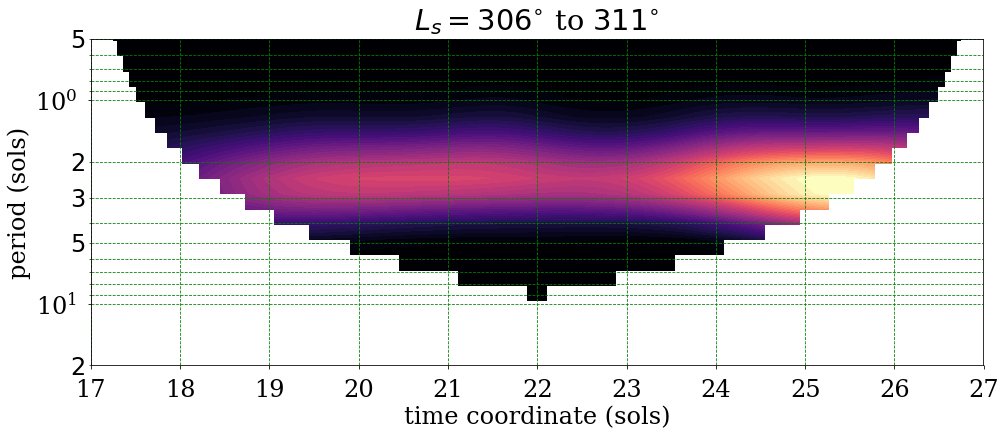

In [8]:
############################
sol = 3700.*24.
############################
window1 = 2. # spp is baroclinic (similar with 3 or 4)
#window1 = 1. # spp is diurnal tide
#window1 = 1./24. # spp is everything large-scale
############################
remove_seasonal = False
remove_seasonal = True # [same result but remove spurious maxima at COI's tip and better contrast]
############################

dpp,spp = apss_lib.smoothresample(data,zevar,ikind="linear",freq=zefreq,reinterpolate=False,window=sol*window1)
wavfield = spp
contrast = 5.
contrast = 1.
if remove_seasonal:
    window2 = sol*10.*zefreq # remove seasonal trend
    dpp, spp = apss_lib.detrendsmooth(spp,window2)
    wavfield = dpp
    contrast = 1.
bounds = int(zefreq*sol*window1)
wavfield = wavfield[bounds:-bounds]

lsin,lsout = apss_lib.insight_sol2ls(solini+window1),apss_lib.insight_sol2ls(solini+solsol-1-window1) 
title = r'$L_s = %i^{\circ}$ to $%i^{\circ}$' % (lsin,lsout)
fifi = "daily_solini%i_solsol%i_%s"%(solini,solsol,zevar)

wavelet.wavelet(wavfield,\
                freq=zefreq,ymin=0.5,ymax=20.,\
                offset = solini+window1,facperiod = sol,unit = "sols",\
                contrast=contrast,title=title,\
                filename=fifi)

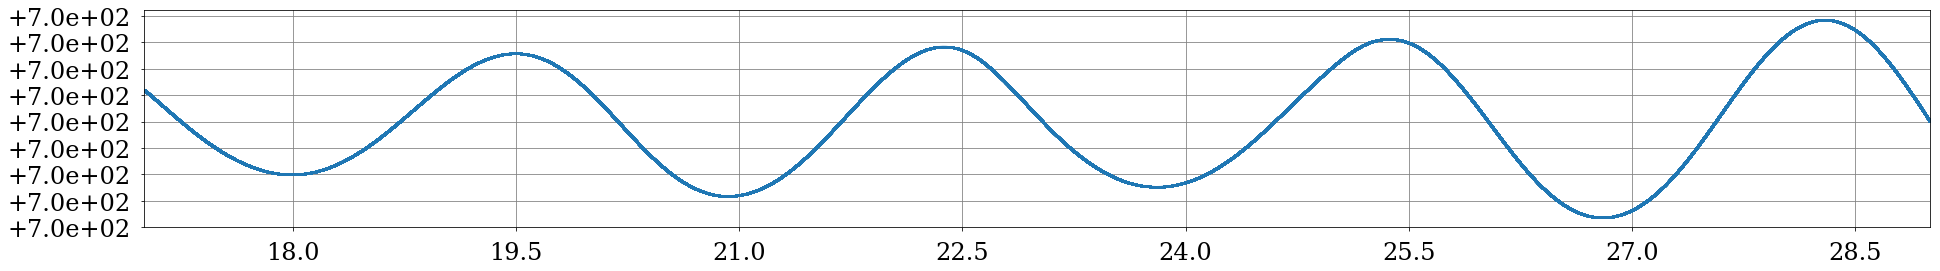

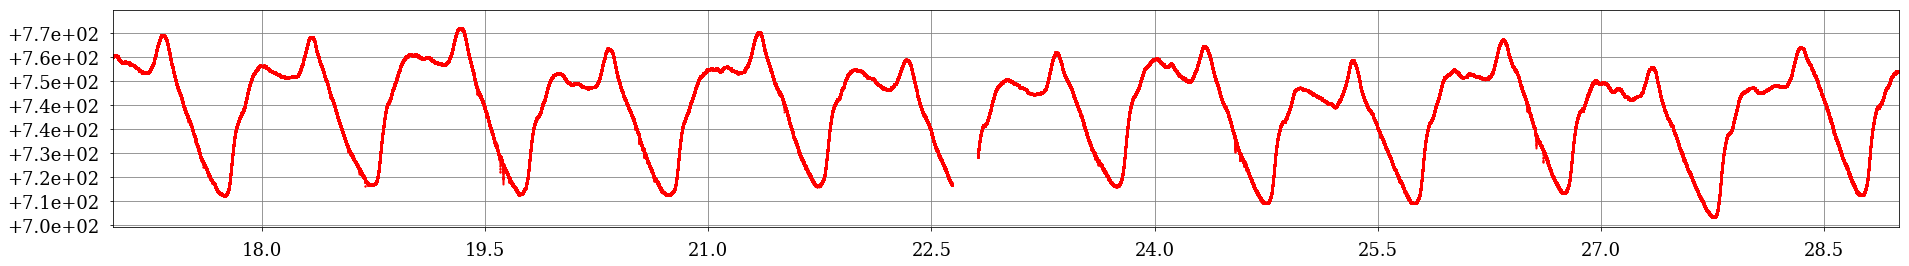

In [9]:
xx = (solini+window1)+((solsol-2)*np.arange(wavfield.size))/float(wavfield.size)
np.save(fifi+"_ff.npy",wavfield)
np.save(fifi+"_xx.npy",xx)

fig = ppplot.figuref(x=32,y=4)
pl = ppplot.plot1d(fig=fig)
pl.f = wavfield+700. ## add 700 just to align x-axis
pl.x = xx
pl.xmin = np.min(xx)
pl.xmax = np.max(xx)
pl.fmt = "%+3.1e"
pl.makeshow()
fig = ppplot.figuref(x=32,y=4)
ppplot.changefont(18)
pl = ppplot.plot1d(fig=fig)
pl.f = data_all[zevar]
pl.x = time_all
pl.marker = "."
pl.linestyle = ""
pl.color = 'r'
pl.xmin = np.min(xx)
pl.xmax = np.max(xx)
pl.fmt = "%+3.1e"
pl.makeshow()


In [10]:
#data = apss_lib.getsol(solini,var="PRE")
#freq = ppcompute.max(data["PRESSURE_FREQUENCY"])
#foo = apss_lib.multisol(solini=solini,solsol=solsol,code="PRE",pds=True,win=3700,freq=freq)

In [11]:
#import numpy as np
#solini = 328
#solsol = 5
#data_all = apss_lib.getsol(solini,var="PRE") 
#time_all = solini + (apss_lib.gettime(data_all,"LMST")/24.) 
#for sol in range(solini+1,solini+solsol):
#    data = apss_lib.getsol(sol,var="PRE") 
#    time = sol + (apss_lib.gettime(data,"LMST")/24.)
#    data_all = np.append(data_all,data)
#    time_all = np.append(time_all,time)
#data = data_all
#time = time_all
##apss_lib.plotvar(data,code=["PRE"])
#dpp,spp = apss_lib.smoothresample(data,"PRE",freq=2,window=2000,complete=True)
#import ppplot
#fig = ppplot.figuref(x=24,y=8)
#pl = ppplot.plot1d(fig=fig)
#pl.f = spp #dpp
#pl.x = time
#pl.marker = ""
#pl.linestyle = "-"
#pl.make()
#ppplot.show()